In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
plt.style.use("fivethirtyeight")

In [4]:
#path_to_file = './datasets/GlobalDataset2017.csv'
Global = pd.read_csv("./datasets/GlobalDataset2017.csv")

In [36]:
##Global = df.drop(df[df==-99].index)

In [5]:
Global.replace(to_replace=-99, value=0, inplace=True, axis=0)

C:\Users\prapa\Anaconda2\lib\site-packages\pandas\core\generic.py:3786: UserWarning: the "axis" argument is deprecated and will be removed inv0.13; this argument has no effect
  warn('the "axis" argument is deprecated and will be removed in'


In [5]:
(Global == -99).sum()

yearOfRegistration                        0
Datasource                                0
gender                                    0
ageBroad                                  0
majorityStatus                            0
majorityStatusAtExploit                   0
majorityEntry                             0
citizenship                               0
meansOfControlDebtBondage                 0
meansOfControlTakesEarnings               0
meansOfControlRestrictsFinancialAccess    0
meansOfControlThreats                     0
meansOfControlPsychologicalAbuse          0
meansOfControlPhysicalAbuse               0
meansOfControlSexualAbuse                 0
meansOfControlFalsePromises               0
meansOfControlPsychoactiveSubstances      0
meansOfControlRestrictsMovement           0
meansOfControlRestrictsMedicalCare        0
meansOfControlExcessiveWorkingHours       0
meansOfControlUsesChildren                0
meansOfControlThreatOfLawEnforcement      0
meansOfControlWithholdsNecessiti

In [ ]:

#feature_col = ["gender", "ageBroad", "majorityStatus", "majorityStatusAtExploit", "majorityEntry", "citizenship", "RecruiterRelationship", "CountryOfExploitation", "recruiterRelationUnknown"]
#feature_col

#df= Global[feature_col]

#df.head()

In [82]:
feature_col = [h for h in Global.columns if (h.startswith("meansOf") or h.startswith("typeOf") or 
                                             h.startswith("recruiter") or h.startswith("is") )
               and h !='meansOfControlNotSpecified']
feature_col

['meansOfControlDebtBondage',
 'meansOfControlTakesEarnings',
 'meansOfControlRestrictsFinancialAccess',
 'meansOfControlThreats',
 'meansOfControlPsychologicalAbuse',
 'meansOfControlPhysicalAbuse',
 'meansOfControlSexualAbuse',
 'meansOfControlFalsePromises',
 'meansOfControlPsychoactiveSubstances',
 'meansOfControlRestrictsMovement',
 'meansOfControlRestrictsMedicalCare',
 'meansOfControlExcessiveWorkingHours',
 'meansOfControlUsesChildren',
 'meansOfControlThreatOfLawEnforcement',
 'meansOfControlWithholdsNecessities',
 'meansOfControlWithholdsDocuments',
 'meansOfControlOther',
 'isForcedLabour',
 'isSexualExploit',
 'isOtherExploit',
 'isSexAndLabour',
 'isForcedMarriage',
 'isForcedMilitary',
 'isOrganRemoval',
 'typeOfLabourAgriculture',
 'typeOfLabourAquafarming',
 'typeOfLabourBegging',
 'typeOfLabourConstruction',
 'typeOfLabourDomesticWork',
 'typeOfLabourHospitality',
 'typeOfLabourIllicitActivities',
 'typeOfLabourManufacturing',
 'typeOfLabourMiningOrDrilling',
 'typeOfL

In [83]:
X = Global[feature_col]

In [84]:
km3 = KMeans(n_clusters=3)

#Fit model on data
km3.fit(X)

#Get the labels

labels = km3.labels_

labels

array([0, 2, 0, ..., 2, 2, 2])

In [85]:
pd.value_counts(labels)

2    32292
0    12878
1     1932
dtype: int64

In [86]:
#Centriod values
cents2 = km3.cluster_centers_

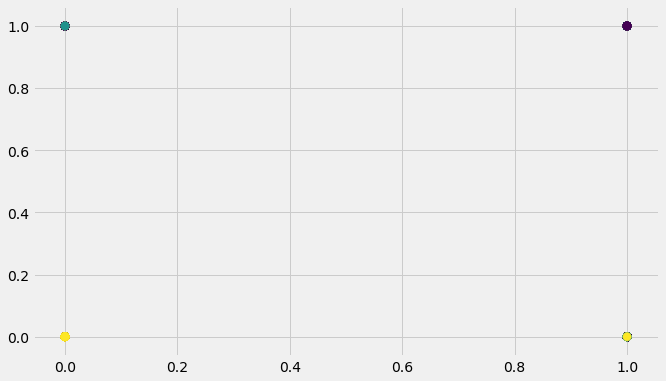

In [88]:

plt.figure(figsize=(10,6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=68, c=labels);

In [89]:
from sklearn.decomposition import TruncatedSVD

In [90]:
trun = TruncatedSVD(n_components=2)

Xt = trun.fit_transform(X.values)

In [91]:
labels

array([0, 2, 0, ..., 2, 2, 2])

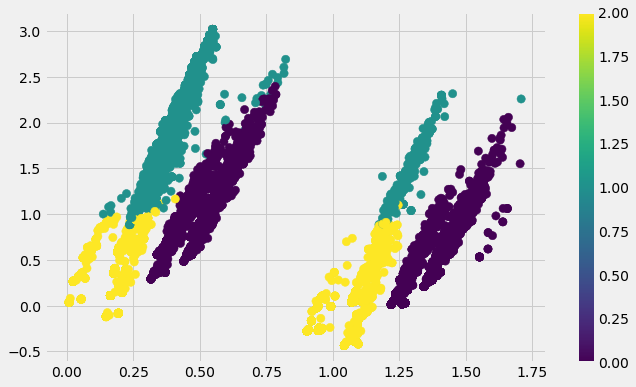

In [92]:

plt.figure(figsize=(10,6))
plt.scatter(Xt[:,0], Xt[:,1], s=68, c=labels)
plt.colorbar();
plt.scatter(centriods[:, 0], centriods[:, 1], s = 800, marker= "+", c = "black");

In [93]:
data = X.copy()

data["labels"] = labels

In [57]:
# data.plot(fi)

In [94]:
data.groupby("labels").mean()

,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlRestrictsFinancialAccess,meansOfControlThreats,meansOfControlPsychologicalAbuse,meansOfControlPhysicalAbuse,meansOfControlSexualAbuse,meansOfControlFalsePromises,meansOfControlPsychoactiveSubstances,meansOfControlRestrictsMovement,...,typeOfSexProstitution,typeOfSexPornography,typeOfSexRemoteInteractiveServices,typeOfSexPrivateSexualServices,isAbduction,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
labels,,,,,,,,,,,,,,,,,,,,,
0,0.025159,0.049852,0.006678,0.110887,0.138997,0.125641,0.064839,0.025547,0.100792,0.120127,...,0.378941,0.004349,0.0,0.000854,0.00497,0.086194,0.031061,0.045582,0.017472,0.800668
1,0.305383,0.791925,0.010352,0.621118,0.741718,0.431677,0.017081,0.834369,0.016563,0.695652,...,0.009317,0.000000,0.0,0.000000,0.00000,0.006211,0.048654,0.024845,0.804348,0.097308
2,0.002787,0.002384,0.000434,0.003035,0.004304,0.003964,0.002508,0.020160,0.000712,0.003468,...,0.000000,0.000000,0.0,0.000000,0.00000,0.000495,0.027933,0.021491,0.057197,0.892048


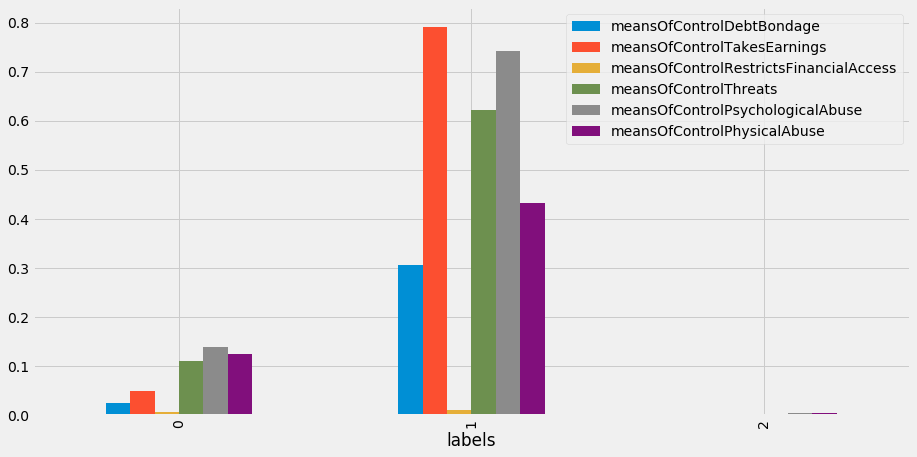

In [95]:
data.groupby("labels").mean().iloc[:, :6].plot(kind="bar", figsize = (14, 7))

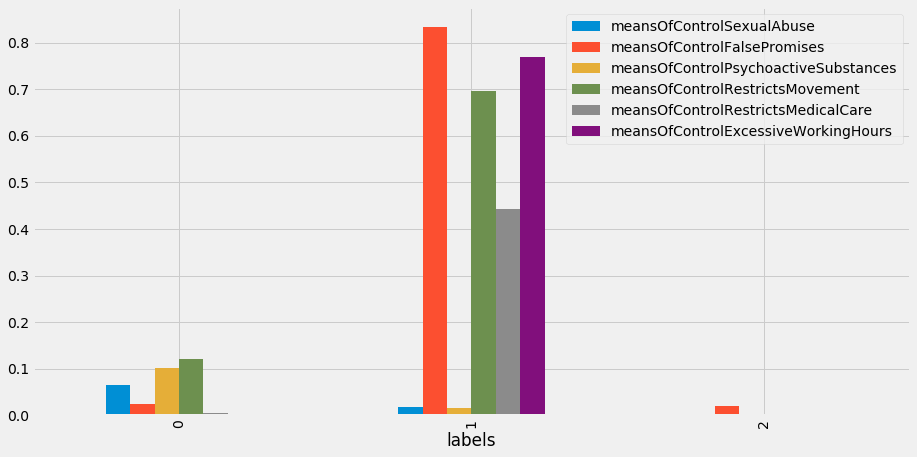

In [96]:
data.groupby("labels").mean().iloc[:, 6:12].plot(kind="bar", figsize = (14, 7))

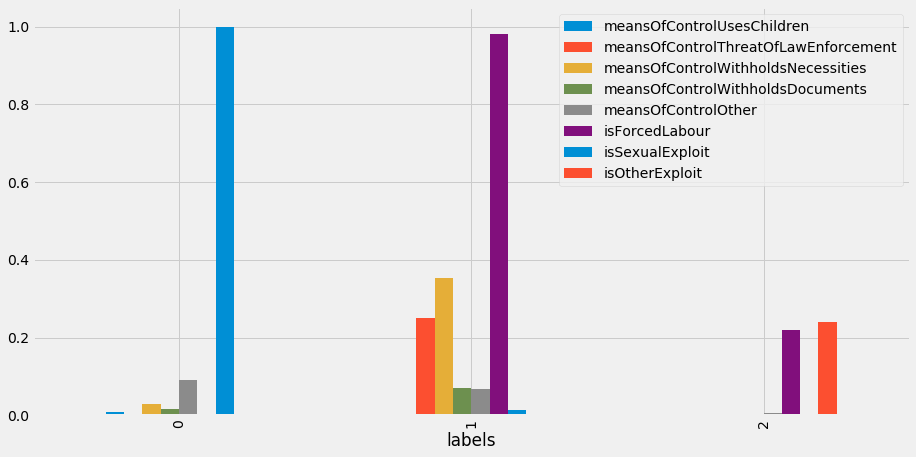

In [97]:
data.groupby("labels").mean().iloc[:, 12:20].plot(kind="bar", figsize = (14, 7))